# Final Project
## LSTM

In [1]:
# Import

# data set
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# LSTM
import tensorflow as tf
import keras
from tensorflow.keras import layers
from sklearn import metrics
%matplotlib inline

### Importing the merged dataset

In [2]:
location = pd.read_csv("Cycle hire docking stations.csv")

In [3]:
dataset_one_month = pd.read_csv(
    'April_1_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

dataset_three_months = pd.read_csv(
    'April_to_June_3_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

dataset_six_months = pd.read_csv(
    'April_to_Oct_6_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

In [4]:
dataset_one_month = dataset_one_month.drop(['index','is_holiday','is_weekend'], axis = 1)
dataset_one_month = dataset_one_month.dropna(axis=0, how='any')

In [5]:
dataset_one_month.head()

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-01,36,22,40,14.0,8.520833,7.895833,66.5,11.166667,1.0,-0.075579,51.5213
2016-04-01,18,31,41,-13.0,8.520833,7.895833,66.5,11.166667,1.0,-0.083911,51.5200
2016-04-01,39,39,42,0.0,8.520833,7.895833,66.5,11.166667,1.0,-0.093904,51.5310
2016-04-01,20,37,43,-17.0,8.520833,7.895833,66.5,11.166667,1.0,-0.157184,51.5203
2016-04-01,24,38,44,-14.0,8.520833,7.895833,66.5,11.166667,1.0,-0.144165,51.5107


In [6]:
dataset_three_months = dataset_three_months.drop(['index','is_holiday','is_weekend'], axis = 1)
dataset_three_months = dataset_three_months.dropna(axis=0, how='any')
dataset_three_months

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-01,36,22,40,14.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.075579,51.5213
2016-04-01,18,31,41,-13.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.083911,51.5200
2016-04-01,39,39,42,0.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.093904,51.5310
2016-04-01,20,37,43,-17.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.157184,51.5203
2016-04-01,24,38,44,-14.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.144165,51.5107
...,...,...,...,...,...,...,...,...,...,...,...
2016-07-01,38,10,720,28.0,16.770833,16.770833,73.291667,22.270833,1.0,-0.205279,51.4872
2016-07-01,20,63,721,-43.0,16.770833,16.770833,73.291667,22.270833,1.0,-0.026263,51.5360
2016-07-01,23,17,722,6.0,16.770833,16.770833,73.291667,22.270833,1.0,-0.058632,51.5246


In [7]:
dataset_six_months = dataset_six_months.drop(['index','is_holiday','is_weekend'], axis = 1)
dataset_six_months = dataset_six_months.dropna(axis=0, how='any')
dataset_six_months

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-01,36,22,40,14.0,8.520833,7.895833,66.50,11.166667,1.0,-0.075579,51.521300
2016-04-01,18,31,41,-13.0,8.520833,7.895833,66.50,11.166667,1.0,-0.083911,51.520000
2016-04-01,39,39,42,0.0,8.520833,7.895833,66.50,11.166667,1.0,-0.093904,51.531000
2016-04-01,20,37,43,-17.0,8.520833,7.895833,66.50,11.166667,1.0,-0.157184,51.520300
2016-04-01,24,38,44,-14.0,8.520833,7.895833,66.50,11.166667,1.0,-0.144165,51.510700
...,...,...,...,...,...,...,...,...,...,...,...
2016-10-30,2,53,785,-51.0,10.680556,10.638889,90.25,4.881944,30.0,-0.010511,51.540900
2016-10-30,1,37,789,-36.0,10.680556,10.638889,90.25,4.881944,30.0,-0.011890,51.538700
2016-10-30,1,35,792,-34.0,10.680556,10.638889,90.25,4.881944,30.0,-0.104541,51.505500


## Plotting

In [8]:
def plot_graph(y_train, y_train_inv, y_test_inv, y_pred_inv, i):

    ## Print heading
    plt.title( 'Station Id: %d' % (i))
    plt.plot(np.arange(0, len(y_train)), y_train_inv, color='green', label="History")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv, color='blue', marker='.', label="Actual")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv, color='red', marker='.', label="Prediction")
    plt.ylabel('Bike Count')
    plt.xlabel('Time Step')
    plt.legend()
    #plt.show();
    
    return plt.show();

## Error calculation

In [9]:
from sklearn import metrics

In [10]:
def get_MAE(y_test_inv, y_pred_inv):
    MAE = metrics.mean_absolute_error(y_test_inv, y_pred_inv)
    return MAE

In [11]:
def get_MSE(y_test_inv, y_pred_inv):
    MSE = metrics.mean_squared_error(y_test_inv, y_pred_inv)
    return MSE

In [12]:
def print_error_calculation(y_test_inv, y_pred_inv):
    print('MAE:', get_MAE(y_test_inv, y_pred_inv))
    print('MSE:', get_MSE(y_test_inv, y_pred_inv))

### Datasets for each stations

In [13]:
# Extract number of bikes leaving to the station
## for loop with 800 station
## put that info to 800 datasets

obj_1_m = dataset_one_month.groupby('Station Id')
obj_3_m = dataset_three_months.groupby('Station Id')
obj_6_m = dataset_six_months.groupby('Station Id')

In [14]:
# add datasets to list

df_1_m = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]
    
for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df_1_m.append(obj_1_m.get_group(i))

In [15]:
# add datasets to list

df_3_m = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]
    
for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df_3_m.append(obj_3_m.get_group(i))

In [16]:
# add datasets to list

df_6_m = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]
    
for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df_6_m.append(obj_6_m.get_group(i))

# LSTM (Long short-term memory neural networks)

In [17]:
# look for 'time_stemps' of history values
def createDataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        data = X.iloc[i:(i + time_steps)].values
        Xs.append(data)        
        ys.append(y.iloc[i + time_steps])
        
    return np.array(Xs), np.array(ys)

/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5617/263184846.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Total'] = total_transformer.transform(train[['Total']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A 

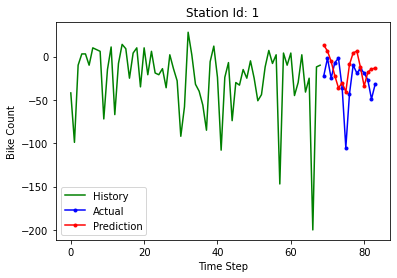

MAE: 22.26470864613851
MSE: 738.255140861996


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5617/263184846.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Total'] = total_transformer.transform(train[['Total']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A 

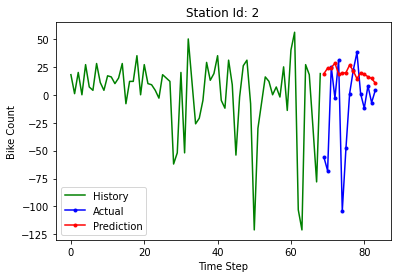

MAE: 35.83877156575521
MSE: 2536.8097050946826


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5617/263184846.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Total'] = total_transformer.transform(train[['Total']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A 

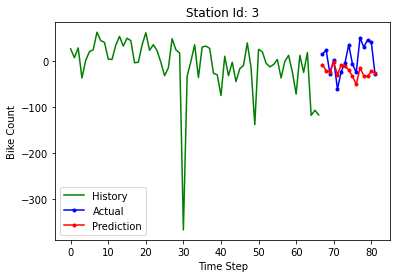

MAE: 33.88392972946167
MSE: 1758.877658268294


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5617/263184846.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Total'] = total_transformer.transform(train[['Total']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A 

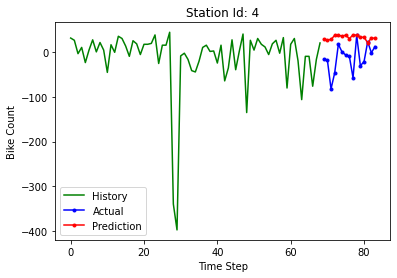

MAE: 46.259653345743814
MSE: 3089.0991153618857


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5617/263184846.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Total'] = total_transformer.transform(train[['Total']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A 

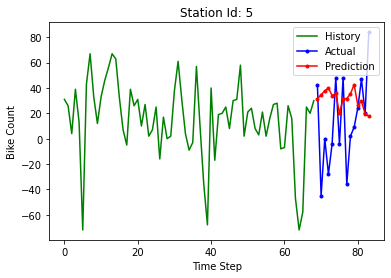

MAE: 33.865194956461586
MSE: 1763.774687875016


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5617/263184846.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Total'] = total_transformer.transform(train[['Total']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A 

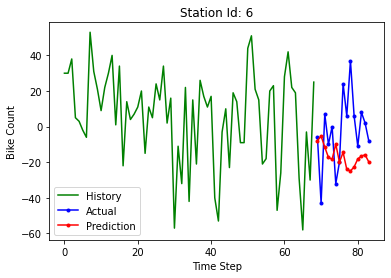

MAE: 21.75092748006185
MSE: 719.2730220611081


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5617/263184846.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Total'] = total_transformer.transform(train[['Total']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A 

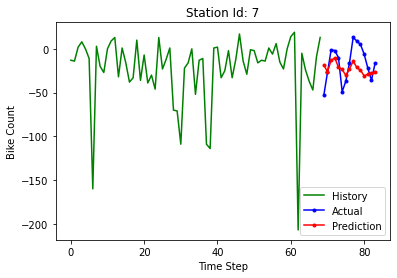

MAE: 16.189893531799317
MSE: 374.8414939319063


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5617/263184846.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Total'] = total_transformer.transform(train[['Total']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A 

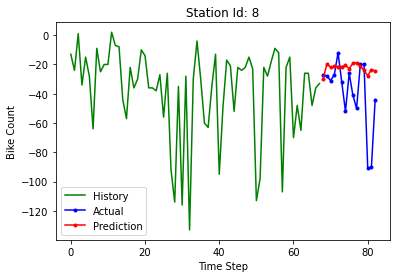

MAE: 19.250350570678712
MSE: 778.0597082129813


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5617/263184846.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Total'] = total_transformer.transform(train[['Total']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A 

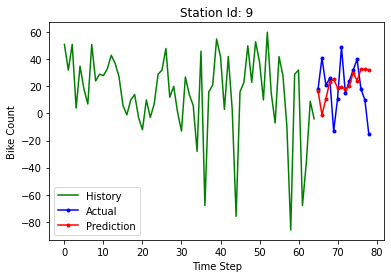

MAE: 17.179300444466726
MSE: 535.0748198871783


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5617/263184846.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Total'] = total_transformer.transform(train[['Total']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A 

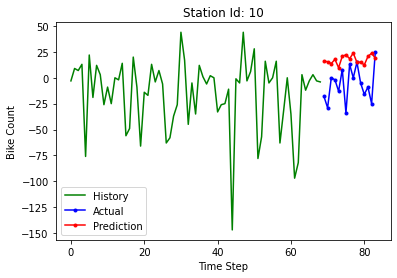

MAE: 24.424193572998046
MSE: 844.4867528972095

Error Calculation
Average MAE: 27.090692384356544
Average MSE: 1313.855210445226


In [18]:
totalMAE = 0
totalMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(0, no_station):  
    # split into train and test sets
    train_size = int(len(df_3_m[i]) * 0.8)
    test_size = len(df_3_m[i]) - train_size

    train, test = df_3_m[i].iloc[0:train_size], df_3_m[i].iloc[train_size:len(df_3_m[i])]
    
    #f_transformer = StandardScaler()
    #total_transformer = StandardScaler()
    
    f_transformer = RobustScaler()
    total_transformer = RobustScaler()
    
    #f_transformer = MinMaxScaler()
    #total_transformer = MinMaxScaler()
    
    feature_columns = ['avg_temp', 'avg_temp_feel', 'avg_humidity', 'avg_windSpeed']
    f_transformer = f_transformer.fit(train[feature_columns].to_numpy())
    train.loc[:, feature_columns] = f_transformer.transform(train[feature_columns].to_numpy())

    total_transformer = total_transformer.fit(train[['Total']])
    train['Total'] = total_transformer.transform(train[['Total']])
    test.loc[:, feature_columns] = f_transformer.transform(test[feature_columns].to_numpy())
    test['Total'] = total_transformer.transform(test[['Total']])

    time_steps = 3
    X_train, y_train = createDataset(train, train['Total'], time_steps)
    X_test, y_test = createDataset(test, test['Total'], time_steps)
    
    from tensorflow.keras import layers

    LSTM_model = keras.Sequential()
    LSTM_model.add(
      layers.Bidirectional(
        layers.LSTM(
          units = 128, 
          input_shape = (X_train.shape[1], X_train.shape[2])
        )
      )
    )
    LSTM_model.add(layers.Dropout(rate = 0.2))
    LSTM_model.add(layers.Dense(units = 1))

    LSTM_model.compile(loss='mean_squared_error', optimizer='adam')
    
    y_pred = LSTM_model.predict(X_test)
    y_train_inv = total_transformer.inverse_transform(y_train.reshape(1, -1)).flatten()
    y_test_inv = total_transformer.inverse_transform(y_test.reshape(1, -1)).flatten()
    y_pred_inv = total_transformer.inverse_transform(y_pred).flatten()


    plot_graph(y_train, y_train_inv, y_test_inv, y_pred_inv, i + 1)
    print_error_calculation(y_test_inv, y_pred_inv)
    totalMAE += get_MAE(y_test_inv, y_pred_inv)
    totalMSE += get_MSE(y_test_inv, y_pred_inv)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)